In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels
from pmdarima import model_selection
import math
import pickle
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
dataset = "clean_minutes"
df = pd.read_csv("../data/" + dataset + ".csv", index_col=0, parse_dates=True)
df

,view
datetime,
1995-08-28 00:00:00,44
1995-08-28 00:01:00,124
1995-08-28 00:02:00,166
1995-08-28 00:03:00,117
1995-08-28 00:04:00,182
...,...
1995-09-10 23:55:00,169
1995-09-10 23:56:00,249
1995-09-10 23:57:00,168


/var/folders/bs/86b5gqbn01v4n3m714kts3vr0000gn/T/ipykernel_27468/2122475201.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  downsampled_df = df.resample(str(freq) + "T").mean()


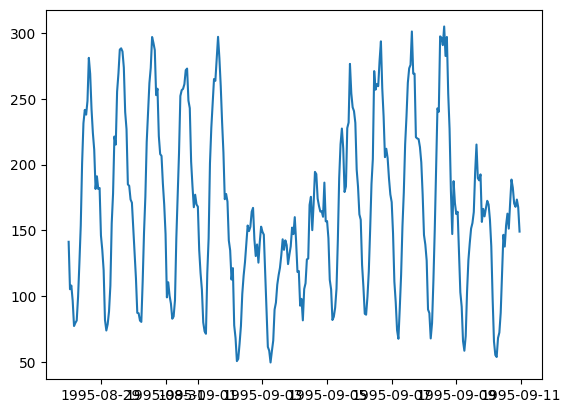

In [4]:
freq = 60
downsampled_df = df.resample(str(freq) + "T").mean()
seasonal_order = (24 * 60) // freq
split = 0.8

raw_data = np.asarray(downsampled_df["view"])
train_size = math.floor(len(raw_data) * split)
train, test = model_selection.train_test_split(raw_data, train_size=train_size)
plt.plot(downsampled_df)
plt.show()

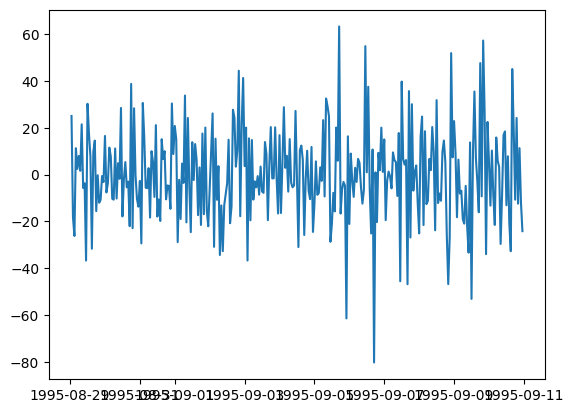

In [41]:
plt.plot(downsampled_df.diff(24).diff())

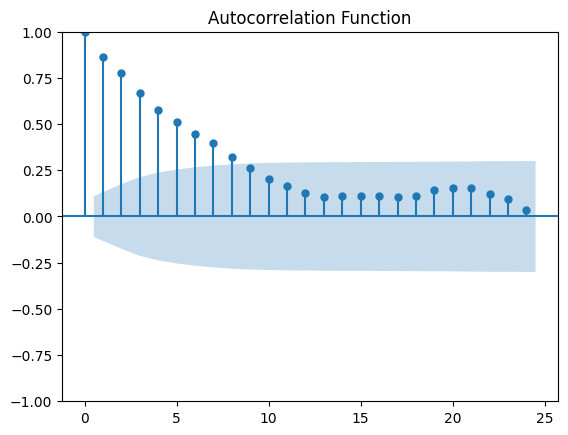

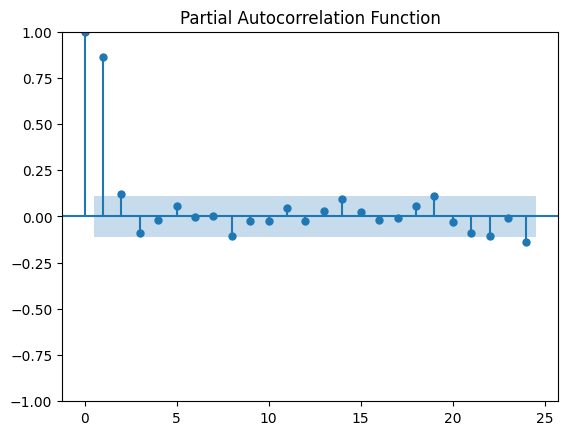

In [25]:
# Plot ACF
plot_acf(downsampled_df.diff(24).dropna(), lags=24)
plt.title("Autocorrelation Function")
plt.show()

# Plot PACF
plot_pacf(downsampled_df.diff(24).dropna(), lags=24)
plt.title("Partial Autocorrelation Function")
plt.show()

From ACF:

p = 1 

P = 


In [9]:
ad_result = adfuller(downsampled_df.diff(24).dropna())
print("ADF Statistic: %f" % ad_result[0])
print("p-value: %f" % ad_result[1])
for key, value in ad_result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.338466
p-value: 0.000381
Critical Values:
   1%, -3.45169128009473
Critical Values:
   5%, -2.8709394227049154
Critical Values:
   10%, -2.5717780602423517


In [61]:
train

array([141.3       , 105.21666667, 108.06666667,  96.5       ,
        77.25      ,  79.63333333,  81.45      ,  99.4       ,
       125.4       , 153.73333333, 200.88333333, 231.5       ,
       241.61666667, 237.98333333, 248.46666667, 281.18333333,
       268.98333333, 242.25      , 224.1       , 211.33333333,
       181.46666667, 191.11666667, 181.45      , 182.21666667,
       146.11666667, 135.05      , 119.68333333,  81.88333333,
        73.86666667,  78.65      ,  88.38333333, 107.91666667,
       155.35      , 177.96666667, 221.36666667, 215.23333333,
       255.56666667, 269.3       , 287.43333333, 288.43333333,
       286.05      , 273.8       , 240.        , 226.91666667,
       184.98333333, 183.83333333, 173.48333333, 171.05      ,
       151.41666667, 132.68333333, 113.58333333,  87.26666667,
        86.96666667,  81.4       ,  80.4       , 111.06666667,
       148.23333333, 175.66666667, 217.23333333, 239.53333333,
       261.95      , 273.6       , 297.03333333, 292.56

In [ ]:
diff = pm.arima.ndiffs(downsampled_df[""], max_d=5, test="adf")
seasonal_diff = pm.arima.nsdiffs(train, seasonal_order, max_D=5, test="ocsb")
print(diff, seasonal_diff)

0 0


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcu

In [53]:
from datetime import datetime

start = datetime.now()

model = pm.auto_arima(train, seasonal=True, m=seasonal_order, d=1, D=1, suppress_warnings=False, start_p=0, start_q=0, max_order=6, stepwise=True, trace=True)

end = datetime.now()

print("Estimated in " + str(end - start))


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=8552.332, Time=0.12 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[24]             : AIC=8315.397, Time=0.91 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=1.72 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=8452.825, Time=0.12 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[24]             : AIC=8263.465, Time=2.45 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=9.32 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=2.65 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[24]             : AIC=8360.196, Time=1.82 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[24]             : AIC=8237.908, Time=3.87 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,0)[24]             : AIC=8290.204, Time=1.46 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=11.32 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=3.47 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[24]             : AIC=8230.342, Time=3.19 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,1,0)[24]             : AIC=8282.038, Time=1.61 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[24]             : AIC=inf, Time=15.13 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,1,1)[24]             : AIC=inf, Time=3.93 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,1,0)[24]             : AIC=8200.084, Time=4.46 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,1,0)[24]             : AIC=8251.059, Time=2.70 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,1,0)(2,1,1)[24]             : AIC=inf, Time=31.19 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,1,1)[24]             : AIC=inf, Time=9.32 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(2,1,0)[24]             : AIC=8201.839, Time=6.85 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(2,1,0)[24]             : AIC=8201.946, Time=7.62 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,0)[24]             : AIC=8219.415, Time=10.19 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(2,1,0)[24]             : AIC=8201.601, Time=15.37 sec


/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,1,0)[24] intercept   : AIC=8201.999, Time=14.96 sec

Best model:  ARIMA(4,1,0)(2,1,0)[24]          
Total fit time: 167.681 seconds
Estimated in 0:02:48.606748


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  806
Model:             SARIMAX(5, 1, 0)x(0, 1, 0, 72)   Log Likelihood               -3346.048
Date:                            Tue, 01 Apr 2025   AIC                           6704.095
Time:                                    13:25:26   BIC                           6731.678
Sample:                                         0   HQIC                          6714.735
                                            - 806                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6147      0.034    -18.105      0.000      -0.681      -0.548
ar.L2         -0.4642      0.041    -11.305      0.000      -0.545      -0.384
ar.L3         -0.3101      0.043     -7.262      0.000      -0.394      -0.226
ar.L4         -0.2249      0.040     -5.562      0.000      -0.304      -0.146
ar.L5         -0.0901      0.035     -2.575      0.010      -0.159      -0.022
sigma2       539.4602     25.846     20.872      0.000     488.804     590.117
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.88
Prob(Q):                              0.91   Prob(JB):                         0.01
Heteroskedasticity (H):               1.33   Skew:                            -0.17
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/marcusalstrom/KTH/year5/degree-project/arima_exog/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


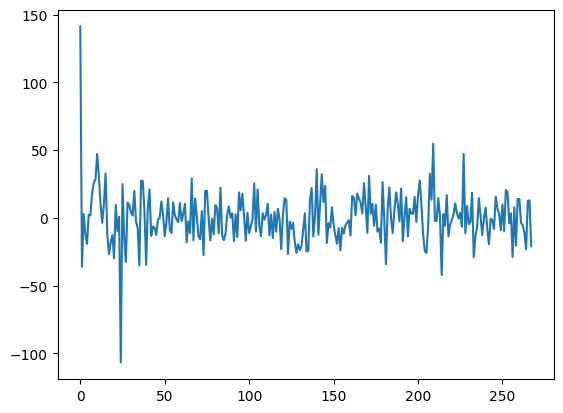

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order=(4,1,2), seasonal_order=(2,1,1,24))
model_fit = model.fit()
plt.plot(model_fit.resid)

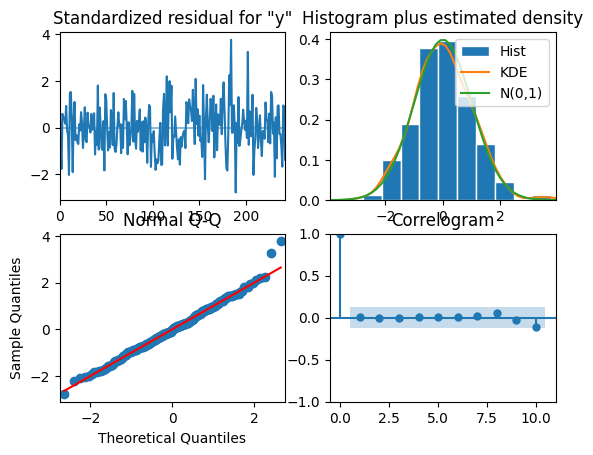

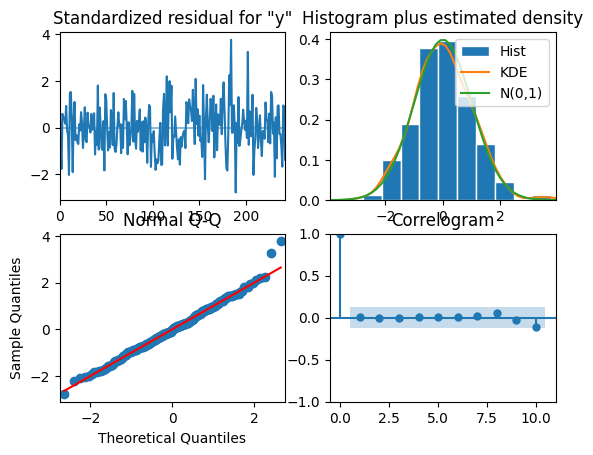

In [38]:
model_fit.plot_diagnostics()

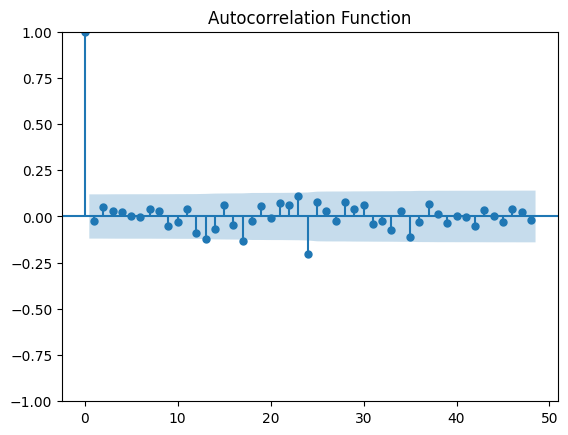

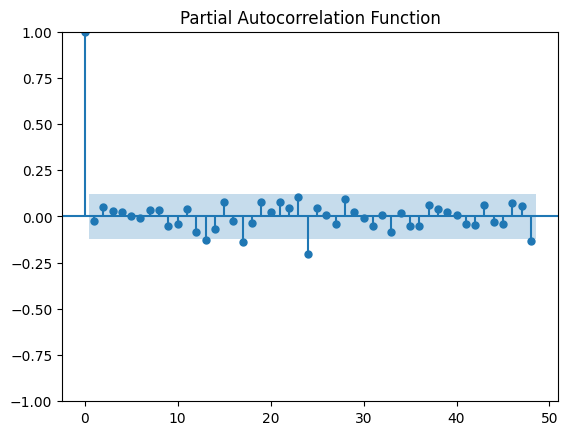

In [39]:
# Plot ACF
plot_acf(model_fit.resid, lags=48)
plt.title("Autocorrelation Function")
plt.show()

# Plot PACF
plot_pacf(model_fit.resid, lags=48)
plt.title("Partial Autocorrelation Function")
plt.show()

In [13]:
plt.plot(forecasts, label="forecast")
plt.plot(test, label="actual")
plt.legend()
plt.show()

NameError: name 'forecasts' is not defined